0.4999999999999999
STABIL LØSNING


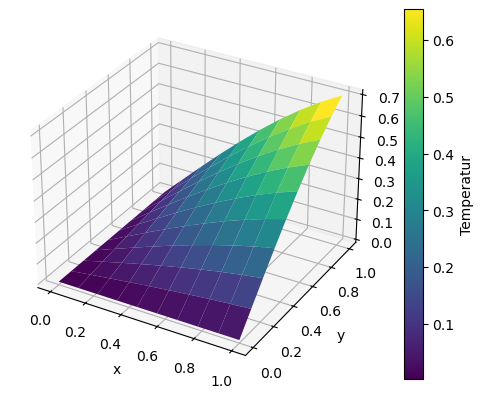

In [19]:
#øvingsoppgave Matte 4

import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.animation as animation
#from matplotlib import cm

#variabler

L_x=1 #lengde på stang
L_y=1 #lengde på y
T=0.25 #tidsrom


#Antall oppdelinger
Nx=10
Ny=10
Nt=50

h_x=L_x/Nx #tidssteg x-retning
h_y=L_y/Ny #tidssteg y-retning
k=T/Nt #tidssteg t-retning

#initialbetsingelse for u:
def initial_temperature(x,y):
    return np.sin(x)*np.sin(y)
    

#diskretiserte punkter
x=np.linspace(0,L_x,Nx)
y=np.linspace(0,L_y,Ny)
t=np.linspace(0,T,Nt)
u0=initial_temperature(*np.meshgrid(x,y))


#løse varmelikningen 
u=np.zeros((Nt,Nx,Ny)) #randkrav innebygd
u[0]=u0.copy() #setter tidspunkt 0 til verdiene fra u0
#print(u)



#sjekke om vi får stabil eller ustabil løsning

krav=k/h_x**2
print(krav)
if krav>=1/2:
    print("KRAVET GÅR IKKE OPP, USTABIL LØSNING")
else:
    print("STABIL LØSNING")


#ekslisitt løsningsmetode
def neste_u(u):
    neste_u=np.zeros((Nx,Ny))
    for i in range(0,Nx-1):
        for j in range(1,Ny-1):
            neste_u[i,j] = k/(h_x**2)*(u[i-1,j]-2*u[i,j]+u[i+1,j]) + k/(h_y**2)*(u[i,j-1] - 2*u[i,j] + u[i,j+1]) + u[i,j] #fyller arrayet neste_u
        return neste_u
        
    for i in range(Nt-1):
        u[:,:,i+1] = neste_u(u[:,:,i])

#plotting- med hjelp fra chat 
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

#meshgrid for x,y,t
X,Y,T=np.meshgrid(x,y,t)


#plotter en 3d overflate og dens temperatur ved tidspunkt 0
surf = ax.plot_surface(X[:,:,0], Y[:,:,0], u[0], cmap='viridis') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperatur')

cb=fig.colorbar(surf)
cb.set_label('Temperatur')

plt.show()
